## Lab 7.1

### Activity 1
Name: `rose-length`

A rose plot is given by 
$$
r(\theta) = \frac{1}{2} \sin ((\theta (2\pi - \theta))^2) +\frac{1}{2}
$$

1. Make a plot of the resulting rose curve for $\theta \in [0,2\pi]$. Add the corresponding unit circle that envelopes the rose curve.
2. Integrate the length of the rose curve to an accuracy of $0.16\%$ or better. Enter into quiz question  `rose-length`.

In [1]:
#%pylab ipympl
%pylab inline
import numpy as np
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


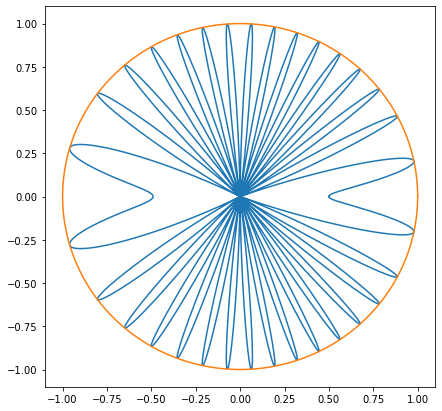

In [2]:
r = lambda theta: 1/2* np.sin((theta*(2*np.pi-theta))**2) + 1/2

thetas = np.linspace(0, 2*np.pi, 10000)
Rs = r(thetas)

x = Rs * np.cos(thetas)
y = Rs * np.sin(thetas)

xcirc = np.cos(thetas)
ycirc = np.sin(thetas)


plt.figure(figsize=(7,7))
plt.plot(x, y)
plt.plot(xcirc, ycirc)
plt.show()

In [3]:
#2 ways of getting arclength
from scipy import integrate

arclen1 = sum(np.sqrt(np.diff(x)**2 + np.diff(y)**2))

arclen2 = sum(np.sqrt(Rs**2 + np.gradient(Rs, thetas[1]-thetas[0])**2)) * (thetas[1]-thetas[0])

print('arclength1 = ', arclen1)
print('arclength2 = ', arclen2)

arclength1 =  62.419375726146015
arclength2 =  62.4150284882996


### Activity 2
Name: `rose-area`

Finish by Thursday 9:30am. 

Integrate the area inside the rose curve for one quadrant ($\theta \in [0,\pi/2]$. 
* Do not use a loop. 
* The accuracy needs to be better than $1\%$. 
* Enter the value of the are into quiz `rose-area`.


In [8]:
#quad = integrating function. input: func, upper&lower limit. returns: integral and estimate of error
# Iq = integrate.quad(r, 0, np.pi/2)
# quad = np.linspace(0, np.pi/2, 10000)
# It = integrate.trapz(r(quad**2)*1/2, quad, dx=1/30000)
# print(Iq, It)

#want area INSIDE curve, not under
#mean value method
def mcintmean_polar(func,thrange,N):
    '''MC integration of function func over xrange - mean-value method'''
    Dth = diff(thrange)[0]
    th = Dth*random.rand(N)+thrange[0]
    favg = (func(th)**2).mean()
    I = favg * Dth /2 
    return I

thrange = (0,pi/2)
N = 100000
# for N in lots of N:
mcintmean_polar(r, thrange, N)

#can also do with other monte carlo method
#check  which uniformly distribbuted random points (in cartesian to avoid bias) are inside rose curve

0.3158419094032324

In [9]:
#integrate.trapz?

Signature: integrate.trapz(y, x=None, dx=1.0, axis=-1)
Docstring:
Integrate along the given axis using the composite trapezoidal rule.

Integrate `y` (`x`) along given axis.

Parameters
----------
y : array_like
    Input array to integrate.
x : array_like, optional
    The sample points corresponding to the `y` values. If `x` is None,
    the sample points are assumed to be evenly spaced `dx` apart. The
    default is None.
dx : scalar, optional
    The spacing between sample points when `x` is None. The default is 1.
axis : int, optional
    The axis along which to integrate.

Returns
-------
trapz : float
    Definite integral as approximated by trapezoidal rule.

See Also
--------
numpy.cumsum

Notes
-----
Image [2]_ illustrates trapezoidal rule -- y-axis locations of points
will be taken from `y` array, by default x-axis distances between
points will be 1.0, alternatively they can be provided with `x` array
or with `dx` scalar.  Return value will be equal to combined area under
th